# Convertion of a dataset for instance segmentation in COCO format:

The goal is to convert a dataset modeling pairs of overlapping chromosomes (a compressed numpy array) into a COCO format using pycocotools.

In [8]:
import json
import os
import datetime

import numpy as np
from scipy import ndimage as nd
import imageio as io
import random
import pycocotools
from pycocotools.mask import encode
import pycocotools.coco as coco
from pycocotools.coco import COCO
import matplotlib.patches as patches

from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def mask_to_bbox_corners(mask, mode='XYXY'):
  '''given a binary mask (0 or int>0) returns the
     bounding box as tuple row0, row1, col0, col1 
     if mode=='XYXY' return a list row0, col0, row1,col1

     Enum of different ways to represent a box.

    In detectron2:
    XYXY_ABS= 0
    (xmin, ymin, xmax, ymax) in absolute floating points coordinates.
    The coordinates in range [0, width or height].
  '''
  col_0 = np.nonzero(mask.any(axis=0))[0][0]
  col_1 = np.nonzero(mask.any(axis=0))[0][-1]
  row_0 = np.nonzero(mask.any(axis=1))[0][0]
  row_1 = np.nonzero(mask.any(axis=1))[0][-1]
  if mode == 'numpy':
     return row_0, row_1,col_0,  col_1
  if mode == 'XYXY':
    xmin = int(col_0)
    xmax = int(col_1)
    ymin = int(row_0)
    ymax = int(row_1)
    return [xmin, ymin, xmax, ymax]

 


In [9]:
# annFile = '/data2/zzhang/annotation/erosiveulcer_fine/trainfp0927.json'
annFile = '/data2/hongrui/project/dataset/annotation/erosiveulcer_fine/trainfp1108.json'
image_dir = '/data2/zzhang/annotation/erosiveulcer_fine/train/images/'
#### 0:erosive 1:ulcer 2:others 3:hemorrhage, 4:cancer

coco=COCO(annFile)

imgIds = coco.getImgIds()

# print('imgInfos', imgInfos)
# print('imgIds', imgIds)
# idx = np.random.randint(0,len(imgInfos))
print(f'total num is {len(imgIds)}')
cat_ids = coco.getCatIds()
print('cat_ids', cat_ids)
# return
# idx_lists = [i for i in range(len(imgInfos))]
num_lists = [0 for _ in range(5)]
pair_cnt = 0
random.shuffle(imgIds)
for i, img_id in enumerate(imgIds):
    # idx = np.random.randint(0,len(imgInfos))
    # print(imgInfo)
    imgInfo = coco.loadImgs(img_id)[0]
    break
# idx = np.random.randint(0,len(imgIds))
# imgInfo = coco.loadImgs(idx)[0]
image = np.array(Image.open(os.path.join(image_dir, imgInfo['file_name'])))
plt.imshow(image, interpolation='nearest')
plt.show()



loading annotations into memory...
Done (t=0.25s)
creating index...
index created!
total num is 2663
cat_ids [1, 2, 3, 4, 5]


KeyError: 2554

In [7]:
plt.imshow(image)
cat_ids = coco.getCatIds()
print('cat_ids', cat_ids)
anns_ids = coco.getAnnIds(imgIds=imgInfo['id'], catIds=cat_ids, iscrowd=None)
print('anns_ids', anns_ids)
ann_content = coco.loadAnns(anns_ids)
print('ann_content', ann_content)

coco.showAnns(ann_content)

NameError: name 'image' is not defined

mask.shape (468, 446) [0]
mask.shape (468, 446) [0 1]


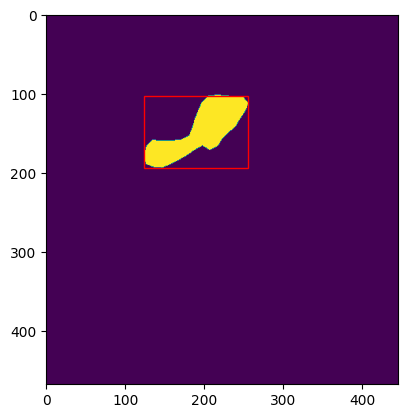

In [5]:
h, w, _ = image.shape
mask = np.zeros((h,w), dtype=np.uint8)
print('mask.shape', mask.shape, np.unique(mask))
for i in range(len(ann_content)):
    mask += coco.annToMask(ann_content[i])
print('mask.shape', mask.shape, np.unique(mask))
bbox = mask_to_bbox_corners(mask)
# plt.imshow(mask)

xmin, ymin, xmax, ymax = bbox
b_h = ymax - ymin
b_w = xmax - xmin

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(mask)

# Create a Rectangle patch
rect = patches.Rectangle((xmin, ymin), b_w, b_h, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()